# The `load_spe.py` module and `Spectrum` class

#### Nicholas S. Yama, 29 June 2022

The `load_spe.py` module contains a series of functions to read `.SPE` files from the Princeton Instruments spectrometers.
It is designed for the `2.X` version of the `.SPE` file format and may not work for the most current version(s) (version `3.X` as of the writing of this notebook).

As an overview, the `load_spe` module has two main functions for general usage, `load_SPE()` and `load_SPEs()` which take a single, or list, of filenames respectively and returns the corresponding `Spectrum` objects.

The `Spectrum` objects are a simple data structure which holds the various data and metadata associated to any spectra recorded in an `.SPE` file.
A `Spectrum` has a variety of attributes:

- `Spectrum.filename` = filename of `.SPE`
- `Spectrum.date_collected` = collection date of `.SPE` file
- `Spectrum.time_collected` = collection time of `.SPE` file
- `Spectrum.SPE_version` = version of `.SPE` file
- `Spectrum.wavelength` = an `ndarray` of shape `(xdim,)` with wavelength data, this is obtained from the calibration numbers and positions recorded in the `.SPE`. This may not be recorded if the system is not set up.
- `Spectrum.xdim` = length of data in x direction. Typically the number of pixels.
- `Spectrum.ydim` = length of data in y direction. Typically 1 for spectra, potentially more for images.
- `Spectrum.num_frames` = number of frames (spectra taken) if system was set up to do this. Typically 1
- `Spectrum.exposure` = exposure time in seconds
- `Spectrum.data` = data array containing the data for each frame in a list. Typically not used except for cases where `num_frames > 1`.
- `Spectrum.int` = the first data vector in the `data` list. Usually used for quick plots.

The `Spectrum` object also has a few basic methods for quick visualization:

- `Spectrum.quick_plot(frames=[0], figsize=(8,5))`: Plots the spectral data for each frame in the array frames (default = `[0]` which means only the first frame is plotted). Figsize can be set but defaults to `(8,5)`. No return value.

- `Spectrum.to_image()`: Returns the data array (multiple frames) stacked on each other as an image

- `Spectrum.quick_plot_image(figsize=(8,5), **kwargs)`: Plots the stacked image as an image

The following demonstrates basic usage to load a spectrum file called `test_spectra.SPE` in the same directory.
Note that you need to have the `Spectrum.py` and `load_spe.py` files in the same directory as your Jupyter Notebook.

In [1]:
# Imports all functions directly from load_spe.py
from load_spe import *

In [2]:
# This loads the .SPE file
s = load_SPE('test_spectra.SPE')

In [3]:
# Print some parameters
print('Filename =', s.filename)
print('xdim =', s.xdim)
print('ydim =', s.ydim)
print('number of frames =', s.num_frames)

Filename = test_spectra.SPE
xdim = 9980
ydim = 1
number of frames = 1


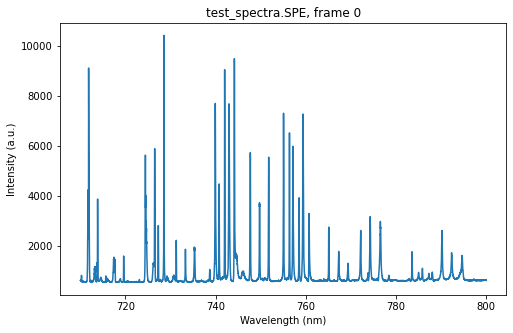

In [4]:
# Quick plot the data
s.quick_plot()

If one wishes to process the data it is often desireable to manage the data directly.
We demonstrate this in the following cells.

In [5]:
import matplotlib.pyplot as plt

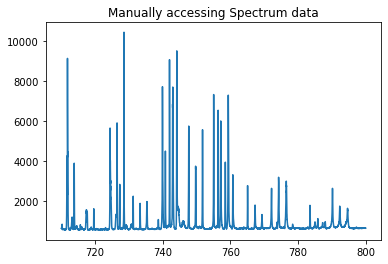

In [6]:
# Get the wavelength and spectral data directly
x = s.wavelength
y = s.int

# Plot it
plt.plot(x,y)
plt.title('Manually accessing Spectrum data')
plt.show()

In [8]:
x

array([710.        , 710.00901976, 710.01803952, ..., 799.99014552,
       799.99916528, 800.00818504])

In [9]:
y

array([622.5385, 630.8627, 621.9816, ..., 622.3794, 625.3337, 625.8587],
      dtype=float32)

In [10]:
s.SPE_version

2.200000047683716

In [11]:
s.SPE_version

2.200000047683716